In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import sys
sys.path.append("/home/mylab-pharma/Code/tuele/pan_HDAC/mylab_panHDAC-master/src/common")
from pharmacy_common import PharmacyCommon

#class to encode smiles
common = PharmacyCommon()

Import the dataset

In [2]:
train_dataset = pd.read_excel('../../data/train_test_data/NoCL/20240321_pan_HDAC_train_test_data.xlsx',sheet_name='train_dataset')
validation_dataset = pd.read_excel("../../data/train_test_data/NoCL/20240321_pan_HDAC_train_test_data.xlsx", sheet_name='validation_dataset')
test_dataset = pd.read_excel("../../data/train_test_data/NoCL/20240321_pan_HDAC_train_test_data.xlsx", sheet_name='test_dataset')
print(len(train_dataset),len(validation_dataset), len(test_dataset))

1528 328 327


In [3]:
train_dataset.head(10)

,Code,SMILES,Bioactivity
0,415897,CC(Nc1ccc(CN(CCC=C2CCC(NO)=O)C2=O)cc1)=O,inactive
1,1589183,COc(cc(/C=C/C(Nc(cccc1)c1N)=O)cc1)c1OCC(Nc(cc1...,inactive
2,1161066,CC[C@H](C)[C@@H](C(N(Cc1c(C2)ccc(OCC(NO)=O)c1)...,active
3,2100074,CC(c1ccccc1)Nc1ncnc2c1cc(-c1ccc(CN3CCN(CCOCCCC...,inactive
4,386804,CC(C)SC(SCC(c1ccc(C)cc1)=O)=S,inactive
5,467667,CCOC(SCC(c(cc1)ccc1NC(C)=O)=O)=S,inactive
6,390739,ONC(/C=C/c1cccc(C(c2cc(cccc3)c3[nH]2)=O)c1)=O,active
7,440474,ONC(CCCCCNC(Nc1cc(-c2nc(cccc3)c3[o]2)ccc1)=O)=O,active
8,2460036,CN1C(SCc(cc2)ccc2C(Nc(cccc2)c2N)=O)=Nc(cc(cc2)...,inactive
9,440227,CCC(c1nc(cccc2)c2[n]1CC)c1ccc(/C=C/C(NO)=O)cc1,active


In [4]:
train_dataset.head(10)

,Code,SMILES,Bioactivity
0,415897,CC(Nc1ccc(CN(CCC=C2CCC(NO)=O)C2=O)cc1)=O,inactive
1,1589183,COc(cc(/C=C/C(Nc(cccc1)c1N)=O)cc1)c1OCC(Nc(cc1...,inactive
2,1161066,CC[C@H](C)[C@@H](C(N(Cc1c(C2)ccc(OCC(NO)=O)c1)...,active
3,2100074,CC(c1ccccc1)Nc1ncnc2c1cc(-c1ccc(CN3CCN(CCOCCCC...,inactive
4,386804,CC(C)SC(SCC(c1ccc(C)cc1)=O)=S,inactive
5,467667,CCOC(SCC(c(cc1)ccc1NC(C)=O)=O)=S,inactive
6,390739,ONC(/C=C/c1cccc(C(c2cc(cccc3)c3[nH]2)=O)c1)=O,active
7,440474,ONC(CCCCCNC(Nc1cc(-c2nc(cccc3)c3[o]2)ccc1)=O)=O,active
8,2460036,CN1C(SCc(cc2)ccc2C(Nc(cccc2)c2N)=O)=Nc(cc(cc2)...,inactive
9,440227,CCC(c1nc(cccc2)c2[n]1CC)c1ccc(/C=C/C(NO)=O)cc1,active


In [5]:
#encoding smiles 
fpt_bits = 1024
X_train = common.gen_ecfp4_fpts(train_dataset['SMILES'],bits = 1024)
X_validation = common.gen_ecfp4_fpts(validation_dataset['SMILES'], bits = 1024)
X_test = common.gen_ecfp4_fpts(test_dataset['SMILES'], bits = 1024)

Progress:   0%|          | 0/1528 [00:00<?, ?it/s]

[18:11:31] Conflicting single bond directions around double bond at index 7.
[18:11:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[18:11:31] Conflicting single bond directions around double bond at index 16.
[18:11:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[18:11:31] Conflicting single bond directions around double bond at index 33.
[18:11:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[18:11:31] Conflicting single bond directions around double bond at index 18.
[18:11:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[18:11:31] Conflicting single bond directions around double bond at index 27.
[18:11:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[18:11:31] Conflicting single bond directions around double bond at index 9.
[18:11:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[18:11:31] Conflicting single bond directi

In [6]:
# encoding the label
import sklearn.preprocessing as preprocessing
y_train = np.array(train_dataset['Bioactivity'])
y_validation = np.array(validation_dataset['Bioactivity'])
y_test = np.array(test_dataset['Bioactivity'])

#Original data
print("Original data:")
print(y_train[0:5])
print(y_test[0:5])
print(y_validation[0:5])

#label encoding
label_encoder = preprocessing.LabelEncoder()
y_train  = label_encoder.fit_transform(y_train)
y_validation = label_encoder.fit_transform(y_validation)
y_test = label_encoder.fit_transform(y_test)
#Class encoded
print("Class encoded:")
print(list(label_encoder.classes_))
print(label_encoder.transform(label_encoder.classes_))
print("Encoded data:")
print(y_train[0:5])
print(y_test[0:5])
print(y_validation[0:5])

Original data:
['inactive' 'inactive' 'active' 'inactive' 'inactive']
['active' 'active' 'active' 'inactive' 'active']
['active' 'active' 'inactive' 'inactive' 'inactive']
Class encoded:
['active', 'inactive']
[0 1]
Encoded data:
[1 1 0 1 1]
[0 0 0 1 0]
[0 0 1 1 1]


In [7]:
#converting to tensor 
X_train_df = pd.DataFrame(X_train)
X_validation_df = pd.DataFrame(X_validation)
X_test_df = pd.DataFrame(X_test)

X_train = torch.tensor(X_train_df.values, dtype=torch.float32)
X_validation = torch.tensor(X_validation_df.values, dtype=torch.float32)
X_test = torch.tensor(X_test_df.values, dtype=torch.float32)

y_train_df = pd.DataFrame(y_train)
y_validation_df = pd.DataFrame(y_validation)
y_test_df = pd.DataFrame(y_test)

y_train = torch.tensor(y_train_df.values, dtype=torch.float32)
y_validation = torch.tensor(y_validation_df.values, dtype=torch.float32)
y_test = torch.tensor(y_test_df.values, dtype=torch.float32)

In [8]:
# Create train and test datasets
train_dataset = TensorDataset(X_train, y_train)
validation_dataset= TensorDataset(X_validation, y_validation)
test_dataset = TensorDataset(X_test, y_test)

In [9]:
# Define the data loaders
batch_size = 32
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [10]:
len(trainloader)

48

In [11]:
data_train = X_train
data_valdation = X_validation
data_test = X_test

labels_validation = y_validation
labels_test = y_test
labels_train= y_train.float()
print(len(data_train), len(labels_train),len(data_valdation),
    len(labels_validation), len(data_test), len(labels_test))
print(data_train)
print(labels_train)

1528 1528 328 328 327 327
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[1.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]])


Feature selection 

In [12]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif

Feature 0: 1.327991
Feature 1: 2.994777
Feature 2: 1.499745
Feature 3: 11.418219
Feature 4: 17.520734
Feature 5: 13.879742
Feature 6: 0.401651
Feature 7: 1.404261
Feature 8: 1.058905
Feature 9: 0.437338
Feature 10: 17.520734
Feature 11: 8.760367
Feature 12: 1.682411
Feature 13: 0.016568
Feature 14: 8.489927
Feature 15: 0.102890
Feature 16: 0.641349
Feature 17: 33.032313
Feature 18: nan
Feature 19: 6.242717
Feature 20: 0.041078
Feature 21: 0.156344
Feature 22: 0.025667
Feature 23: 9.378827
Feature 24: 0.702130
Feature 25: 9.717568
Feature 26: 0.035471
Feature 27: 0.068463
Feature 28: 1.284201
Feature 29: 2.063549
Feature 30: 3.589276
Feature 31: 10.095653
Feature 32: 1.742674
Feature 33: 1.606656
Feature 34: 0.424351
Feature 35: 0.570312
Feature 36: 10.109451
Feature 37: 0.013693
Feature 38: 5.933495
Feature 39: 1.856120
Feature 40: 0.208651
Feature 41: 1.503238
Feature 42: 1.542728
Feature 43: 10.711598
Feature 44: 1.366333
Feature 45: 9.140523
Feature 46: 0.724871
Feature 47: 0.341664

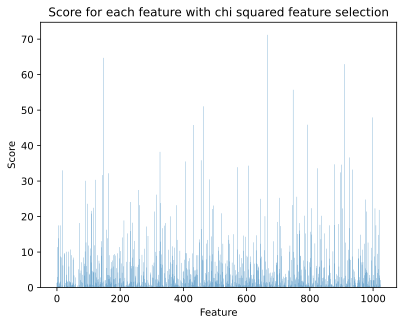

In [36]:
# chi squared
fs = SelectKBest(score_func=chi2, k= 10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_validation_fs = fs.transform(X_validation)

# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.title("Score for each feature with chi squared feature selection")
plt.xlabel('Feature')
plt.ylabel('Score')
pyplot.show()

In [14]:
X_validation_fs.shape

(328, 10)

/home/mylab-pharma/.conda/envs/tuele-pharma-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.029779
Feature 4: 0.019590
Feature 5: 0.000000
Feature 6: 0.005011
Feature 7: 0.000000
Feature 8: 0.005649
Feature 9: 0.001886
Feature 10: 0.002121
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.021167
Feature 14: 0.032631
Feature 15: 0.000000
Feature 16: 0.000000
Feature 17: 0.015915
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.006498
Feature 22: 0.000000
Feature 23: 0.012391
Feature 24: 0.000000
Feature 25: 0.007149
Feature 26: 0.000000
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.028529
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.000000
Feature 34: 0.000000
Feature 35: 0.002869
Feature 36: 0.000000
Feature 37: 0.002613
Feature 38: 0.015412
Feature 39: 0.000000
Feature 40: 0.000000
Feature 41: 0.004874
Feature 42: 0.002604
Feature 43: 0.001172
Feature 44: 0.000000
Feature 45: 0.000000
Feature 46: 0.006083
Feature 47: 0.017818
Fe

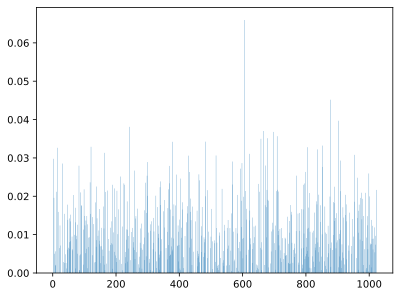

In [15]:
# mutual information Feature selection
fs = SelectKBest(score_func= mutual_info_classif, k=10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_valdation_fs = fs.transform(X_validation)

# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

ANN model

In [16]:
len(X_train[0])

1024

In [17]:
# model
class ann_try(nn.Module):
    def __init__(self, input_dim= 1024,layer1=512,layer2=256,drp=.2,output=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,layer1),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer1,layer2),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer2,output),
            nn.Sigmoid(),
        )
    def forward(self,input):
        return self.net(input)

In [18]:
# trainning
def training(x_train = X_train,y_train=y_train,x_validation = X_validation,
            #  y_validation = y_validation,lr=0.001,l2=0.001,batch_size=64,epochs=100):
            y_validation = y_validation,lr=0.007206041689487159,l2=0.004176049826978714,batch_size=128,epochs=500):
    torch.manual_seed(0)
    losses=[]

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    model = ann_try()
    # model = ann_try()
    loss_func = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=l2)
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # if epoch==0 or  epoch % 2 == 0:
        #     print(loss)
        losses.append(loss)
    losses_tensor = torch.tensor(losses)
    
    # plt.title("Loss in training")
    # plt.xlabel('Numepoch')
    # plt.ylabel('Loss_value')
    # plt.plot(losses_tensor.detach())
    
    model.eval()
    y_pred_train = model(x_train)>.5
    acc_train = 100*torch.mean((y_pred_train == y_train).float())
    y_pred = model(x_validation)>.5
    acc_val = 100*torch.mean((y_pred == y_validation).float())

    # mse = mean_squared_error(model(x_validation).detach().numpy(),y_.detach().numpy())

    # print('Accuracy on validation set:' ,acc_train)
    # print('Accuracy on validation set:' ,acc_val)

    return acc_train, acc_val #to specify what to maximize in this function

In [19]:
training(X_train,y_train,X_validation,y_validation)

(tensor(97.9712), tensor(84.7561))

Models with Feature selection

In [20]:
# mutual information feature selection
def mutual_info_select_features(X_train, y_train, X_validation, numfeatures):
 fs = SelectKBest(score_func=mutual_info_classif, k = numfeatures)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_validation_fs = fs.transform(X_validation)
 return X_train_fs, X_validation_fs

In [21]:
# chi squared feature selection
def chi_squared_select_features(X_train, y_train, X_validation,numfeatures):
 fs = SelectKBest(score_func=chi2, k = numfeatures)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_validation_fs = fs.transform(X_validation)
 return X_train_fs, X_validation_fs

In [22]:
X_train_fs, X_validation_fs = mutual_info_select_features(X_train, y_train, X_validation, numfeatures=5)

X_train_df = pd.DataFrame(X_train_fs)
X_validation_df = pd.DataFrame(X_validation_fs)

X_train_tmp = torch.tensor(X_train_df.values, dtype=torch.float32)
X_validation_tmp = torch.tensor(X_validation_df.values, dtype=torch.float32)
X_train_tmp.type()

/home/mylab-pharma/.conda/envs/tuele-pharma-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'torch.FloatTensor'

In [23]:
len(X_train_tmp[0])

5

In [25]:
# trainning
def training_with_feature_selection(x_train = X_train,y_train=y_train,x_validation = X_validation,
            #  y_validation = y_validation,lr=0.001,l2=0.001,batch_size=64,epochs=100):
            y_validation = y_validation,lr=0.007206041689487159,l2=0.004176049826978714,batch_size=128,epochs=500):
    torch.manual_seed(0)
    losses=[]

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    #model 
    # model
    class ann_try_tmp(nn.Module):
        def __init__(self, input_dim= len(x_train[0]),layer1=512,layer2=256,drp=.2,output=1):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(input_dim,layer1),
                nn.ReLU(),
                nn.Dropout(drp),
                nn.Linear(layer1,layer2),
                nn.ReLU(),
                nn.Dropout(drp),
                nn.Linear(layer2,output),
                nn.Sigmoid(),
            )
        def forward(self,input):
            return self.net(input)

    model = ann_try_tmp()
    loss_func = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=l2)
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        losses.append(loss)
    losses_tensor = torch.tensor(losses)
    
    # plt.title("Loss in training")
    # plt.xlabel('Numepoch')
    # plt.ylabel('Loss_value')
    # plt.plot(losses_tensor.detach())
    
    model.eval()
    y_pred_train = model(x_train)>.5
    acc_train = 100*torch.mean((y_pred_train == y_train).float())
    y_pred = model(x_validation)>.5
    acc_val = 100*torch.mean((y_pred == y_validation).float())

    # mse = mean_squared_error(model(x_validation).detach().numpy(),y_.detach().numpy())

    # print('Accuracy on validation set:' ,acc_train)
    # print('Accuracy on validation set:' ,acc_val)

    return acc_train, acc_val #to specify what to maximize in this function

Progress: 100%|██████████| 19/19 [09:30<00:00, 30.01s/it, Train Accuracy=tensor(98.4948), Validation Accuracy=tensor(82.0122)]


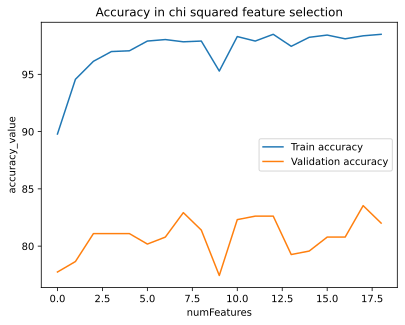

In [33]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

# Assuming you have already defined accs_train and accs_val

accs_train = []
accs_val = []

pbar = tqdm(range(100, 1023,50), desc="Progress")  # Create a progress bar

for i in pbar:
    X_train_fs, X_validation_fs = chi_squared_select_features(X_train, y_train, X_validation, numfeatures=i)
    X_train_df = pd.DataFrame(X_train_fs)
    X_validation_df = pd.DataFrame(X_validation_fs)

    X_train_tmp = torch.tensor(X_train_df.values, dtype=torch.float32)
    X_validation_tmp = torch.tensor(X_validation_df.values, dtype=torch.float32)

    acc_train, acc_val = training_with_feature_selection(X_train_tmp, y_train, X_validation_tmp, y_validation)
    accs_train.append(acc_train)
    accs_val.append(acc_val)
    pbar.set_postfix({"Train Accuracy": acc_train, "Validation Accuracy": acc_val})  # Update the progress bar with current accuracy values

accs_train_tensor = torch.tensor(accs_train)
accs_val_tensor = torch.tensor(accs_val)

plt.title("Accuracy in chi squared feature selection")
plt.xlabel('numFeatures')
plt.ylabel('accuracy_value')
plt.plot(accs_train_tensor.detach(), label="Train accuracy")
plt.plot(accs_val_tensor.detach(), label='Validation accuracy')
plt.legend()
plt.show()

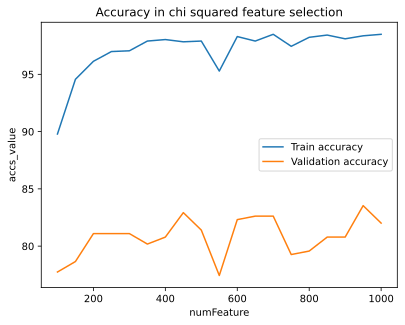

In [34]:

x = range(100, 1024, 50)

plt.plot(x, accs_train, label='Train accuracy')
plt.plot(x, accs_val, label='Validation accuracy')
plt.xlabel('numFeature')
plt.ylabel('accs_value')
plt.title('Accuracy in chi squared feature selection')
plt.legend()
plt.show()